## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
# 1. Stem-and-leaf Display

We will draw stem-and-leaf display with ApTest data.

In [2]:
ap_data = pd.read_excel('./ApTest.xlsx')
ap_data.head(10)

,Correct
0,112
1,73
2,126
3,82
4,92
5,115
6,95
7,84
8,68
9,100


### 1-1. Plot stem-and-leaf by using stemgraphic package.

Before we import stemgraphic package, we have to install stemgraphic package.

In [3]:
!pip install stemgraphic

In [4]:
import stemgraphic as sg

(<Figure size 540x216 with 1 Axes>, <Axes:>)

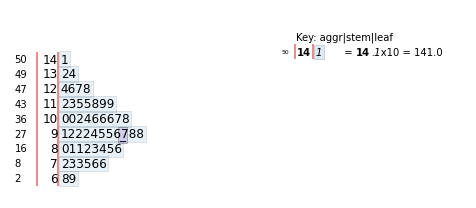

In [5]:
sg.stem_graphic(ap_data.Correct.values, scale=10)

### 1-2. Make our own stem-and-leaf display.

✅ **pandas.DataFrame.groupby**

* pandas.DataFrame.groupby is the most frequently used function when we produce statistics in python.
* This function groups DataFrame using a mapper or by a Series of columns.
* https://pandas.pydata.org/docs/reference/groupby.html

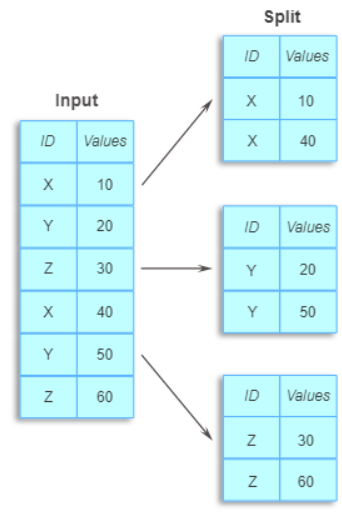

* Above figure represents the result of pandas.DataFrame.groupby(by=ID).

✅ **map**
* This function returns an iterator that applies function to every item of iterable.
* https://docs.python.org/3/library/functions.html#map

✅ **join**
* This function returns a string which is the concatenation of the strings in iterable
* https://docs.python.org/3/library/stdtypes.html#str.join

✅ **numpy.where**
* This function returns elements chosen from x or y depending on condition.
* We can obtain indices of elements that we want by using this function.
* https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [6]:
# The % symbol in Python is called the Modulo Operator.
ap_data["Leafs"] = [x%10 for x in ap_data.Correct.values]

# "//" is a normal division operation except that it returns the largest possible integer.
ap_data["Stems"] = [x//10 for x in ap_data.Correct.values]

In [7]:
# Convert the bundle of groups into list type to iterate them.
# list[::-1] means it is in reverse order 
for stem, leafs in list(ap_data.groupby(by="Stems")["Leafs"])[::-1]: # ✅ pandas.DataFrame.groupby
    # Sort the leafs
    leafs = leafs.sort_values().values     
    # Remove bracket 
    leafs = ' '.join(map(str, leafs)) # ✅ map ✅ join
    print(f'{stem:2d} |  {leafs}')

14 |  1
13 |  2 4
12 |  4 6 7 8
11 |  2 3 5 5 8 9 9
10 |  0 0 2 4 6 6 6 7 8
 9 |  1 2 2 2 4 5 5 6 7 8 8
 8 |  0 1 1 2 3 4 5 6
 7 |  2 3 3 5 6 6
 6 |  8 9


We can stretch the display vertically by using two stems for each leading digit(s).

In [8]:
n_stems = 2

for stem, leafs in list(ap_data.groupby("Stems")["Leafs"])[::-1]:
    leafs = leafs.sort_values().values
    for i in range(n_stems):
        if i == 0 :
            print_leafs = leafs[np.where(leafs<5)] # ✅ numpy.where
        else :
            print_leafs = leafs[np.where(leafs>=5)] # ✅ numpy.where
        
        str_leafs = ' '.join(map(str, print_leafs))
        print(f'{stem:2d} |  {str_leafs}')

14 |  1
14 |  
13 |  2 4
13 |  
12 |  4
12 |  6 7 8
11 |  2 3
11 |  5 5 8 9 9
10 |  0 0 2 4
10 |  6 6 6 7 8
 9 |  1 2 2 2 4
 9 |  5 5 6 7 8 8
 8 |  0 1 1 2 3 4
 8 |  5 6
 7 |  2 3 3
 7 |  5 6 6
 6 |  
 6 |  8 9


### 1-3. Matplotlib.pyplot also allows you provide stem-and-leaf display by using stem function.

However, we cannot distinguish the duplicated value in this display.

✅ **matplotlib.pyplot.stem**
* This function creates a stem plot based on x and y.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html

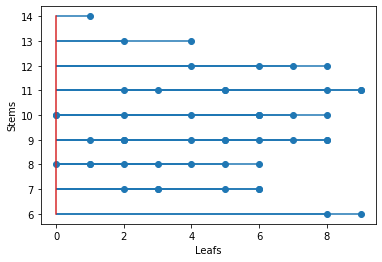

In [9]:
plt.xlabel('Leafs')
plt.ylabel('Stems')

# For horizontal stem plots, we have to set orientation to 'horizontal'.
plt.stem(ap_data["Stems"], ap_data["Leafs"], orientation='horizontal') # ✅ matplotlib.pyplot.stem
plt.show()

---
# 2. Crosstabulation

We will figure out a relationship between **Morningstar Rank** and **5 Year Average Return** by using crosstabulation.

In [10]:
mf_data = pd.read_excel('./MutualFunds.xlsx')
mf_data.head(10)

,Fund Name,Fund Type,Net Asset Value ($),5 Year Average Return (%),Expense Ratio (%),Morningstar Rank
0,Amer Cent Inc & Growth Inv,DE,28.88,12.39,0.67,2-Star
1,American Century Intl. Disc,IE,14.37,30.53,1.41,3-Star
2,American Century Tax-Free Bond,FI,10.73,3.34,0.49,4-Star
3,American Century Ultra,DE,24.94,10.88,0.99,3-Star
4,Ariel,DE,46.39,11.32,1.03,2-Star
5,Artisan Intl Val,IE,25.52,24.95,1.23,3-Star
6,Artisan Small Cap,DE,16.92,15.67,1.18,3-Star
7,Baron Asset,DE,50.67,16.77,1.31,5-Star
8,Brandywine,DE,36.58,18.14,1.08,4-Star
9,Brown Cap Small,DE,35.73,15.85,1.20,4-Star


We need to define the class with quantitative data (5 Year Average Return) for crosstabulation.

In [11]:
class_num = 10

maxim = max(mf_data['5 Year Average Return (%)'])
minim = min(mf_data['5 Year Average Return (%)'])

class_width = (maxim - minim) / class_num
class_width

4.873

In [12]:
class_width = 5

In [13]:
bins = list(range(0, int(maxim)+class_width, class_width))
labels = [f'{x}-{x+class_width-1}' for x in bins[:-1]]

print('Limits for each class: ', labels)

Limits for each class:  ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']


In [14]:
mf_data['5 Year Average Return Class'] = pd.cut(mf_data['5 Year Average Return (%)'], bins, labels=labels, right=False)
mf_data.head(10)

,Fund Name,Fund Type,Net Asset Value ($),5 Year Average Return (%),Expense Ratio (%),Morningstar Rank,5 Year Average Return Class
0,Amer Cent Inc & Growth Inv,DE,28.88,12.39,0.67,2-Star,10-14
1,American Century Intl. Disc,IE,14.37,30.53,1.41,3-Star,30-34
2,American Century Tax-Free Bond,FI,10.73,3.34,0.49,4-Star,0-4
3,American Century Ultra,DE,24.94,10.88,0.99,3-Star,10-14
4,Ariel,DE,46.39,11.32,1.03,2-Star,10-14
5,Artisan Intl Val,IE,25.52,24.95,1.23,3-Star,20-24
6,Artisan Small Cap,DE,16.92,15.67,1.18,3-Star,15-19
7,Baron Asset,DE,50.67,16.77,1.31,5-Star,15-19
8,Brandywine,DE,36.58,18.14,1.08,4-Star,15-19
9,Brown Cap Small,DE,35.73,15.85,1.20,4-Star,15-19


✅ **pandas.crosstab**
- This function computes a simple cross tabulation of two (or more) factors. 
- https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html


In [15]:
pd.crosstab(mf_data['5 Year Average Return Class'], mf_data['Morningstar Rank']) # ✅ pandas.crosstab

Morningstar Rank,2-Star,3-Star,4-Star,5-Star
5 Year Average Return Class,,,,
0-4,0,4,2,2
5-9,1,0,0,1
10-14,3,5,3,0
15-19,0,6,7,4
20-24,0,1,2,1
30-34,0,2,0,0
50-54,0,0,1,0


---
# 3. Scatter Diagram

We are going to look for a relationship between **Net Asset Value** and **5 Year Average Return** by using scatter diagram this time.



✅ **pandas.DataFrame.dropna**
- This function removes missing values.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

✅ **numpy.polyfit**
- This function returns the least squares polynomial fit for given data.
- It computes polynomial coefficients that best fit input data in least-squares sense.
- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

✅ **numpy.poly1d**
- This function creates a one-dimensional polynomial class.
- https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

In [16]:
# Remove NaN(Not-A-Number) data to draw trendline
mf_data.dropna(inplace=True)

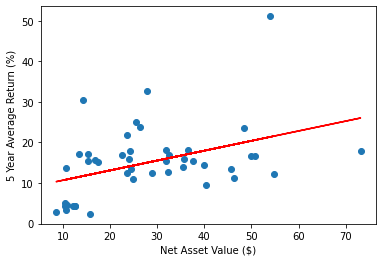

In [17]:
plt.xlabel('Net Asset Value ($)')
plt.ylabel('5 Year Average Return (%)')

x = mf_data['Net Asset Value ($)']
y = mf_data['5 Year Average Return (%)']

plt.scatter(x,y)

# Calculate equation for trendline
z = np.polyfit(x, y, 1) # ✅ numpy.polyfit
p = np.poly1d(z) # ✅ numpy.poly1d

# Add trendline to plot
plt.plot(x, p(x), color='red')

plt.show()